In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [11]:
data = pd.read_csv('breast-cancer.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [12]:
data = data.drop(columns=['id'], errors='ignore')
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


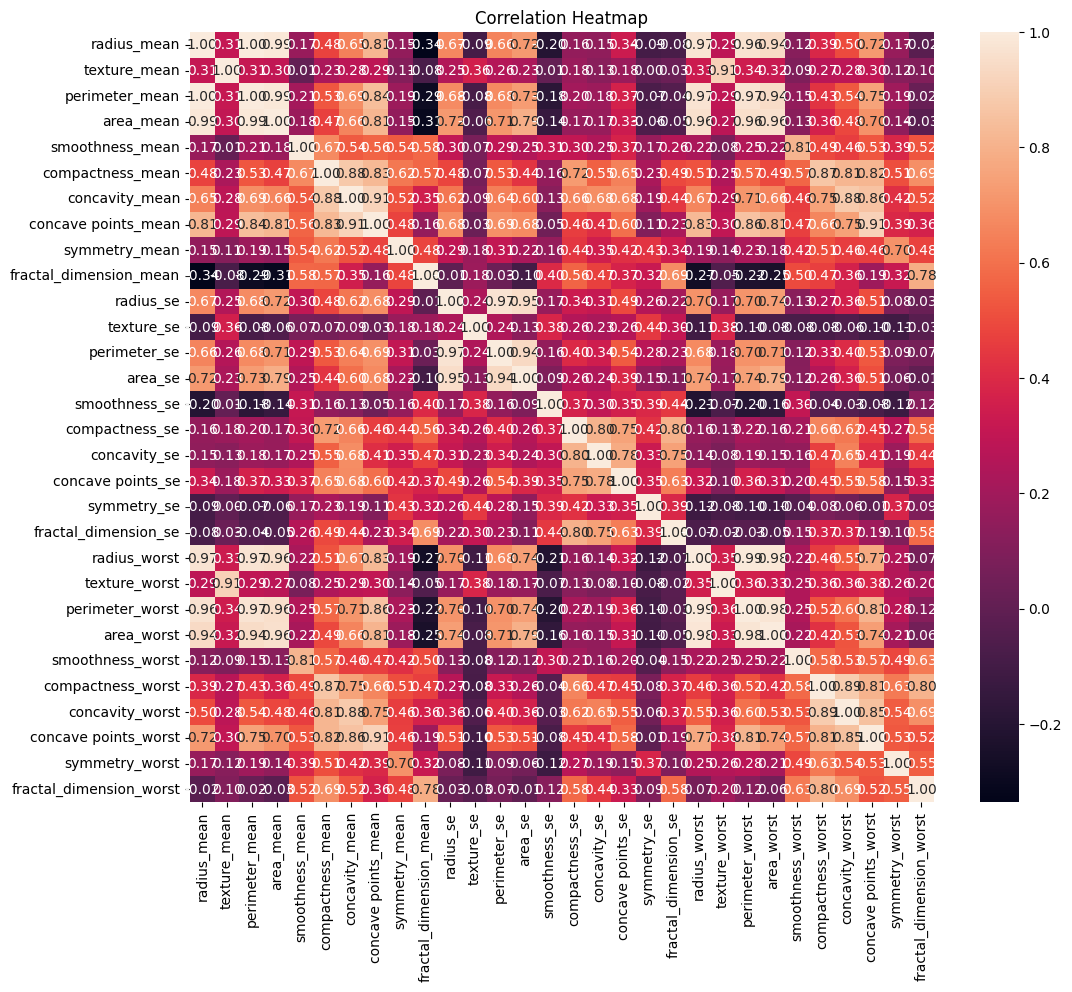

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

correlated_features = set()
threshold = 0.8

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_features.add(correlation_matrix.columns[i])
X_train_filtered = X_train.drop(columns=correlated_features)
X_test_filtered = X_test.drop(columns=correlated_features)


In [16]:
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=10000, random_state=42)
rfe = RFE(model, n_features_to_select=10)  

X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
importances = rf_model.feature_importances_

threshold = 0.05
selected_features = X.columns[importances > threshold]


X_train_embedded = X_train[selected_features]
X_test_embedded = X_test[selected_features]


In [18]:

model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_filtered, y_train)

y_pred_filtered = model.predict(X_test_filtered)
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)

print(f'Accuracy with Filtered Features: {accuracy_filtered * 100:.2f}%')


Accuracy with Filtered Features: 92.11%


In [19]:
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f'Accuracy with RFE Selected Features: {accuracy_rfe * 100:.2f}%')


Accuracy with RFE Selected Features: 97.37%


In [20]:
model.fit(X_train_embedded, y_train)
y_pred_embedded = model.predict(X_test_embedded)
accuracy_embedded = accuracy_score(y_test, y_pred_embedded)

print(f'Accuracy with Embedded Features: {accuracy_embedded * 100:.2f}%')


Accuracy with Embedded Features: 97.37%


In [21]:

results = {
    'Filter Method Accuracy': accuracy_filtered,
    'Wrapper Method (RFE) Accuracy': accuracy_rfe,
    'Embedded Method Accuracy': accuracy_embedded
}

for method, acc in results.items():
    print(f"{method}: {acc * 100:.2f}%")


Filter Method Accuracy: 92.11%
Wrapper Method (RFE) Accuracy: 97.37%
Embedded Method Accuracy: 97.37%
